In [190]:
import pandas as pd
import numpy as np

In [191]:
Cs_All= pd.read_excel('../data/CS_전국.xlsx', encoding='euc-kr')
Cs_All.head()

,일시,시도지역코드,발생건수(건)
0,20140101.0,서울,715
1,20140101.0,부산,554
2,20140101.0,대구,370
3,20140101.0,인천,437
4,20140101.0,광주,480


In [192]:
Cs_All.index
Cs_All.head()

,일시,시도지역코드,발생건수(건)
0,20140101.0,서울,715
1,20140101.0,부산,554
2,20140101.0,대구,370
3,20140101.0,인천,437
4,20140101.0,광주,480


In [ ]:
#지역별 가중치를 찾기전 천식과 어떤것이 관련성이 있는지 찾기 위해 전국으로 기준삼음
#지역별로 그룹지어 전국만 따로 데이터를 추출한다

In [193]:
grouped=Cs_All.groupby("시도지역코드")

In [194]:
for name, group in grouped:
    print(name)
    print(group)

AA
               일시 시도지역코드  발생건수(건)
16     20140101.0     AA     8183
33     20140102.0     AA    49933
50     20140103.0     AA    42445
67     20140104.0     AA    34976
84     20140105.0     AA     4222
101    20140106.0     AA    52657
118    20140107.0     AA    37687
135    20140108.0     AA    34711
152    20140109.0     AA    34184
169    20140110.0     AA    37398
186    20140111.0     AA    33736
203    20140112.0     AA     4222
220    20140113.0     AA    51410
237    20140114.0     AA    36935
254    20140115.0     AA    36323
271    20140116.0     AA    37238
288    20140117.0     AA    40432
305    20140118.0     AA    35937
322    20140119.0     AA     4792
339    20140120.0     AA    54047
356    20140121.0     AA    39284
373    20140122.0     AA    40792
390    20140123.0     AA    42385
407    20140124.0     AA    46257
424    20140125.0     AA    39765
441    20140126.0     AA     5458
458    20140127.0     AA    66179
475    20140128.0     AA    52812
492    2014

In [195]:
grouped.get_group('AA')

,일시,시도지역코드,발생건수(건)
16,20140101.0,AA,8183
33,20140102.0,AA,49933
50,20140103.0,AA,42445
67,20140104.0,AA,34976
84,20140105.0,AA,4222
101,20140106.0,AA,52657
118,20140107.0,AA,37687
135,20140108.0,AA,34711
152,20140109.0,AA,34184
169,20140110.0,AA,37398


In [196]:
W_All= pd.read_csv('../data/2014.csv', encoding='euc-kr')
W_All.head()

,지점,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),평균 이슬점온도(°C),최소 상대습도(%),최소 상대습도 시각(hhmi),평균 상대습도(%),평균 증기압(hPa)
0,108,20140101,4.0,0.3,723,7.9,1535,-5.5,29.0,1459,51.3,4.2
1,108,20140102,1.5,-1.3,724,6.2,1507,-12.9,17.0,1404,35.4,2.3
2,108,20140103,2.3,-1.1,635,7.3,1338,-6.2,32.0,1311,54.4,4.0
3,108,20140104,-0.1,-3.7,722,5.6,1344,-10.3,33.0,1416,47.1,2.8
4,108,20140105,-0.8,-4.3,810,3.8,1418,-10.7,27.0,1557,48.4,2.7


In [197]:
data_result1=pd.merge(grouped.get_group('AA'), W_All, on='일시')
data_result1.head()

,일시,시도지역코드,발생건수(건),지점,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),평균 이슬점온도(°C),최소 상대습도(%),최소 상대습도 시각(hhmi),평균 상대습도(%),평균 증기압(hPa)
0,20140101.0,AA,8183,108,4.0,0.3,723,7.9,1535,-5.5,29.0,1459,51.3,4.2
1,20140102.0,AA,49933,108,1.5,-1.3,724,6.2,1507,-12.9,17.0,1404,35.4,2.3
2,20140103.0,AA,42445,108,2.3,-1.1,635,7.3,1338,-6.2,32.0,1311,54.4,4.0
3,20140104.0,AA,34976,108,-0.1,-3.7,722,5.6,1344,-10.3,33.0,1416,47.1,2.8
4,20140105.0,AA,4222,108,-0.8,-4.3,810,3.8,1418,-10.7,27.0,1557,48.4,2.7


In [198]:
del data_result1['지점']
del data_result1['시도지역코드']
del data_result1['최저기온 시각(hhmi)']
del data_result1['평균 이슬점온도(°C)']
del data_result1['최소 상대습도 시각(hhmi)']
data_result1.head()

,일시,발생건수(건),평균기온(°C),최저기온(°C),최고기온(°C),최고기온 시각(hhmi),최소 상대습도(%),평균 상대습도(%),평균 증기압(hPa)
0,20140101.0,8183,4.0,0.3,7.9,1535,29.0,51.3,4.2
1,20140102.0,49933,1.5,-1.3,6.2,1507,17.0,35.4,2.3
2,20140103.0,42445,2.3,-1.1,7.3,1338,32.0,54.4,4.0
3,20140104.0,34976,-0.1,-3.7,5.6,1344,33.0,47.1,2.8
4,20140105.0,4222,-0.8,-4.3,3.8,1418,27.0,48.4,2.7


In [199]:
O3_All=pd.read_csv('../data/O3_All.csv', encoding='euc-kr')
O3_All.head()

,지점,일시,평균 오존전량(DU)
0,132.0,2014. 1. 1.,382.5
1,132.0,2014. 1. 2.,327.7
2,132.0,2014. 1. 3.,323.3
3,132.0,2014. 1. 4.,315.5
4,132.0,2014. 1. 5.,311.5


In [ ]:
#일교차 행이 없기때문에 계산을 위해 만들어준다

In [206]:
data_result1['일교차']=data_result1['최고기온(°C)']-data_result1['최저기온(°C)']
data_result1.head()

,일시,발생건수(건),평균기온(°C),최저기온(°C),최고기온(°C),최고기온 시각(hhmi),최소 상대습도(%),평균 상대습도(%),평균 증기압(hPa),일교차
0,20140101.0,8183,4.0,0.3,7.9,1535,29.0,51.3,4.2,7.6
1,20140102.0,49933,1.5,-1.3,6.2,1507,17.0,35.4,2.3,7.5
2,20140103.0,42445,2.3,-1.1,7.3,1338,32.0,54.4,4.0,8.4
3,20140104.0,34976,-0.1,-3.7,5.6,1344,33.0,47.1,2.8,9.3
4,20140105.0,4222,-0.8,-4.3,3.8,1418,27.0,48.4,2.7,8.1


In [210]:
data_result1['일교차 관련비율']=data_result1['일교차']/data_result['발생건수(건)']*100
data_result1['최저기온 관련비율']=data_result1['최저기온(°C)']/data_result['발생건수(건)']*100
data_result1['평균상대습도 관련비율']=data_result1['평균 상대습도(%)']/data_result['발생건수(건)']*100
data_result1['증기압 관련비율']=data_result1['평균 증기압(hPa)']/data_result['발생건수(건)']*100
data_result1

,일시,발생건수(건),평균기온(°C),최저기온(°C),최고기온(°C),최고기온 시각(hhmi),최소 상대습도(%),평균 상대습도(%),평균 증기압(hPa),일교차,일교차 관련비율,최저기온 관련비율,평균상대습도 관련비율,증기압 관련비율
0,20140101.0,8183,4.0,0.3,7.9,1535,29.0,51.3,4.2,7.6,0.092875,0.003666,0.626909,0.051326
1,20140102.0,49933,1.5,-1.3,6.2,1507,17.0,35.4,2.3,7.5,0.015020,-0.002603,0.070895,0.004606
2,20140103.0,42445,2.3,-1.1,7.3,1338,32.0,54.4,4.0,8.4,0.019790,-0.002592,0.128166,0.009424
3,20140104.0,34976,-0.1,-3.7,5.6,1344,33.0,47.1,2.8,9.3,0.026590,-0.010579,0.134664,0.008005
4,20140105.0,4222,-0.8,-4.3,3.8,1418,27.0,48.4,2.7,8.1,0.191852,-0.101847,1.146376,0.063951
5,20140106.0,52657,0.8,-3.7,6.4,1428,31.0,50.4,3.2,10.1,0.019181,-0.007027,0.095714,0.006077
6,20140107.0,37687,3.0,0.3,5.5,1429,43.0,56.0,4.3,5.2,0.013798,0.000796,0.148592,0.011410
7,20140108.0,34711,0.5,-5.7,4.0,1,31.0,56.6,3.9,9.7,0.027945,-0.016421,0.163061,0.011236
8,20140109.0,34184,-7.8,-10.4,-4.3,1527,13.0,26.3,0.9,6.1,0.017845,-0.030424,0.076937,0.002633
9,20140110.0,37398,-4.7,-9.3,-0.9,1307,30.0,48.6,2.2,8.4,0.022461,-0.024868,0.129953,0.005883


In [ ]:
#상관분석을 한다
#상관계수와 절대값이(0.1이하-거의 무시/0.3이하-약한 상관관계/0.7이하-뚜렷한 상관관계)
#값이 만약 마이너스라면(-0.1이하-거의 무시/-0.3이하-약한 음의 상관관계/-0.7이하-뚜렷한 음의 상관관계)

In [212]:
np.corrcoef(data_result1['일교차 관련비율'], data_result1['발생건수(건)'])

array([[ 1.        , -0.72673785],
       [-0.72673785,  1.        ]])

In [213]:
np.corrcoef(data_result1['최저기온 관련비율'], data_result1['발생건수(건)'])

array([[ 1.        , -0.52796268],
       [-0.52796268,  1.        ]])

In [214]:
np.corrcoef(data_result1['평균상대습도 관련비율'], data_result1['발생건수(건)'])

array([[ 1.        , -0.77210313],
       [-0.77210313,  1.        ]])

In [215]:
np.corrcoef(data_result1['증기압 관련비율'], data_result1['발생건수(건)'])

array([[ 1.        , -0.61994449],
       [-0.61994449,  1.        ]])

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [221]:
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']=False

if platform.system()=='Darwin':
    rc('font', family='AppleGothic')
elif platform.system()=='Windows':
    path="c:/Windows/Fonts/malgun.ttf"
    font_name=font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~')

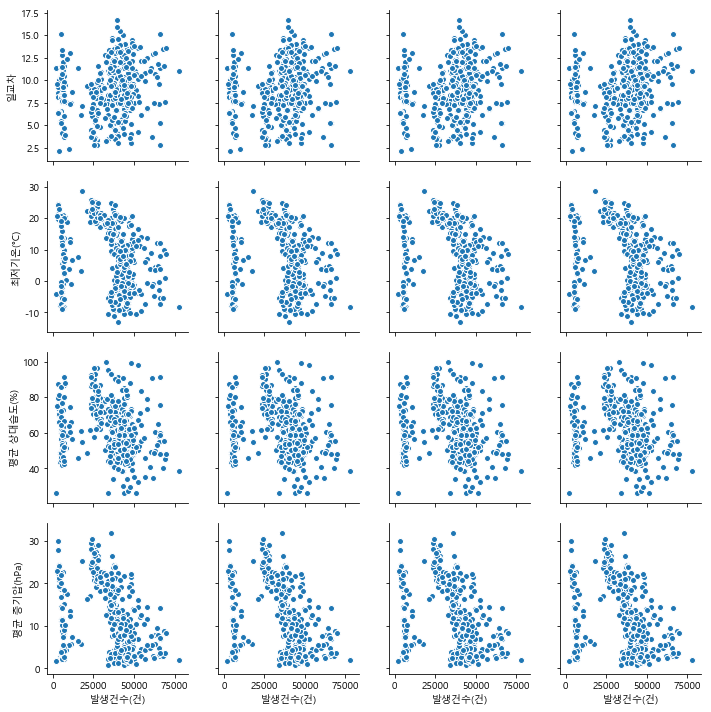

In [224]:
sns.pairplot(data_result1,
            x_vars=["발생건수(건)", "발생건수(건)", "발생건수(건)", "발생건수(건)" ],
            y_vars=["일교차","최저기온(°C)", "평균 상대습도(%)","평균 증기압(hPa)" ])
plt.show()